# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [16]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

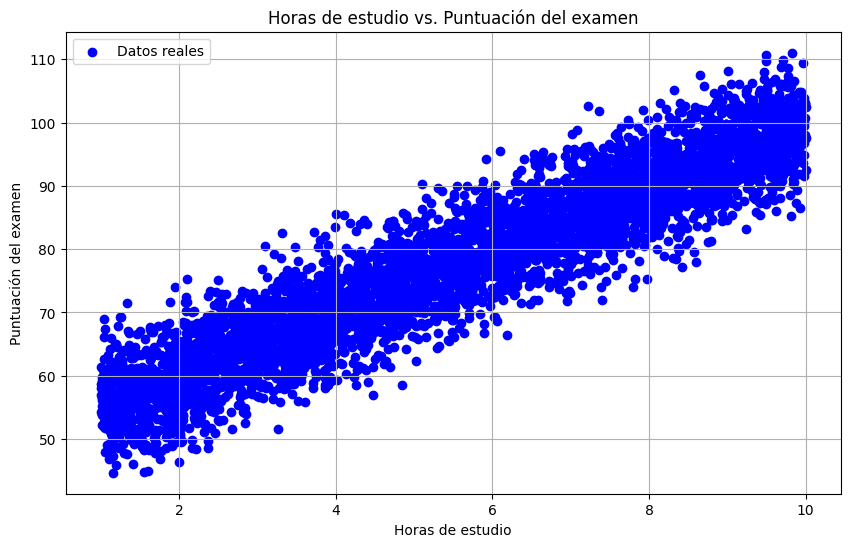

In [17]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=0) 

# A COMPLETAR

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 4000
Datos de Validación: 500
Datos de Test: 500


## Implementación manual de la regresión con gradiente descendente

In [19]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    n = len(y_true)
    cost = np.sum((y_true - y_pred) ** 2) / n
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):

    # 1. Inicializar w y b.
    w = np.random.randn(1)
    b = np.random.randn(1)
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # 2. Bucle por epoch
    for epoch in range(epochs):

        # 3. Calcular y_pred del conjunto de entrenamiento
        y_pred_train = w * X_train + b

        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # 5. Calcular los gradientes para los pesos w y b
        dw = (-2 / len(y_train)) * np.sum((y_train - y_pred_train) * X_train)
        db = (-2 / len(y_train)) * np.sum(y_train - y_pred_train)

        # 6. Actualizar los pesos w y b
        w = w - lr * dw
        b = b - lr * db

        # 7. Calcular y_pred del conjunto de validación
        y_pred_val = w * X_val + b

        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)


    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [25]:
# Hiperparámetros
lr = 0.001
epochs = 10000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

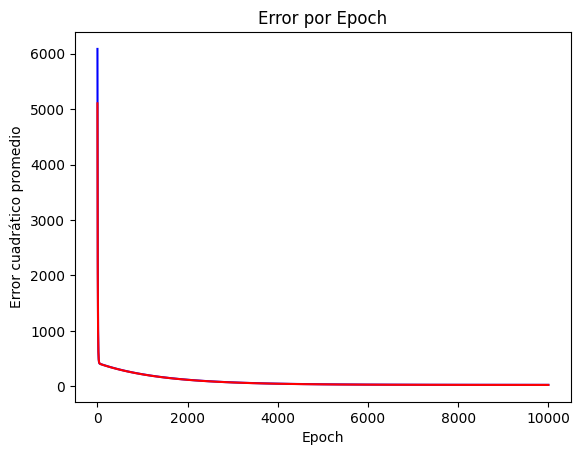

In [26]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 24.100065848985054


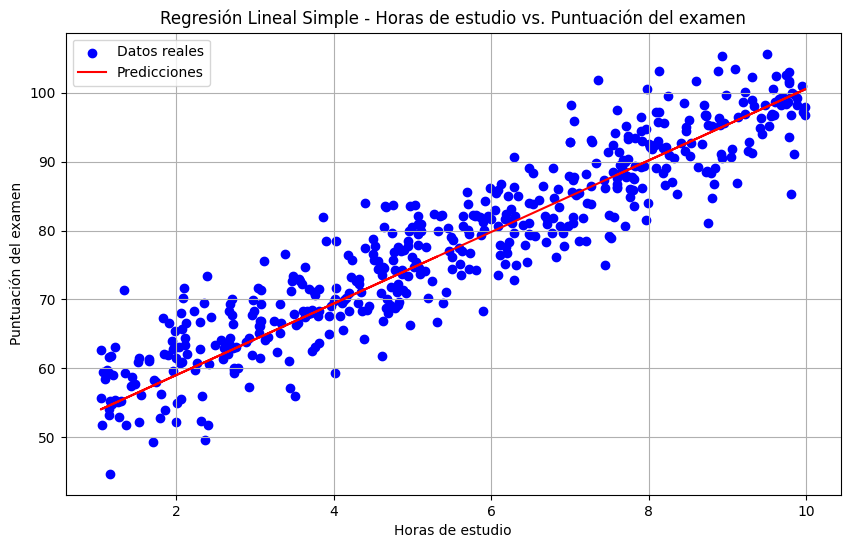

In [27]:
# Realizar predicciones en test
y_pred = w * X_test + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 24.100065848985054
MAE en el conjunto de test: 3.8356928318865067
R^2 en el conjunto de test: 0.8603834568542722
MAPE en el conjunto de test: 0.050574380876549474


## Implementación de la regresión lineal usando sklearn

In [29]:
# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

Costo del modelo: 23.288982076918813


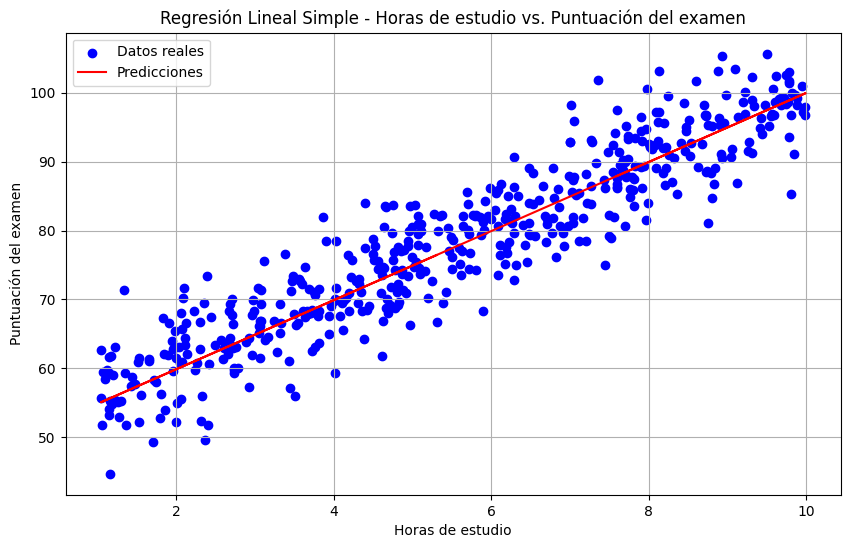

In [30]:
# Realizar predicciones en test
y_pred = model.predict(X_test.reshape(-1, 1))

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 23.288982076918813
MAE en el conjunto de entrenamiento: 3.767799863044828
R^2 en el conjunto de entrenamiento: 0.8650822287649829
MAPE en el conjunto de entrenamiento: 0.04973318388216697


## Comparación de parámetros obtenidos

In [32]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: [48.62171141]
Coeficiente de pendiente (w) - Manual: [5.19310095]
Coeficiente de intercepción (b) - Scikit-learn: 49.83155279304182
Coeficiente de pendiente (w) - Scikit-learn: 5.012726226563381
